# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [34]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [35]:
# Configurar para exibir todas as colunas
pd.set_option('display.max_columns', None)

In [36]:
#carregar arquivo
df=pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [37]:
#excluir colunas desnecessarias
df.drop(['Unnamed: 0','index','mau'],axis=1,inplace=True)

In [38]:
df  

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [40]:
# verificar dados ausentes
df.isna().sum()

data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [41]:
#preencher com valores random dados faltantes
#cria lista de valores possiveis mantendo a probabilidade estatistica dos valores
possible_values = df['tempo_emprego'].dropna().tolist() 
df['tempo_emprego'].fillna(random.choice(possible_values), inplace=True)
df.isna().any() # retorna booleano para presença de dados faltantes em cada coluna

data_ref                 False
sexo                     False
posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego            False
qt_pessoas_residencia    False
renda                    False
dtype: bool

In [42]:
# Converter a coluna 'data' para o tipo datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Converter a coluna float em int
df['qt_pessoas_residencia'] = df['qt_pessoas_residencia'].astype(int)

# Trocar valores categóricos por 1 e 0
df['sexo'] = df['sexo'].replace({'M': 1, 'F': 0}).astype(int)

df['posse_de_veiculo'] = df['posse_de_veiculo'].replace({'True': 1, 'False': 0}).astype(int)

df['posse_de_imovel'] = df['posse_de_imovel'].replace({'True': 1, 'False': 0}).astype(int)

# Trocar valores categóricos em dummies
df=pd.get_dummies(df) # transform categories into values

In [43]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_ref                       15000 non-null  datetime64[ns]
 1   sexo                           15000 non-null  int32         
 2   posse_de_veiculo               15000 non-null  int32         
 3   posse_de_imovel                15000 non-null  int32         
 4   qtd_filhos                     15000 non-null  int64         
 5   idade                          15000 non-null  int64         
 6   tempo_emprego                  15000 non-null  float64       
 7   qt_pessoas_residencia          15000 non-null  int32         
 8   renda                          15000 non-null  float64       
 9   tipo_renda_Assalariado         15000 non-null  uint8         
 10  tipo_renda_Bolsista            15000 non-null  uint8         
 11  tipo_renda_Empr

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,tipo_renda_Assalariado,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Primário,educacao_Pós graduação,educacao_Secundário,educacao_Superior completo,educacao_Superior incompleto,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,0,0,1,1,36,3.575342,3,3369.24,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2015-01-01,1,1,1,0,42,0.860274,2,6096.14,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2015-01-01,1,1,1,2,31,8.065753,4,5658.98,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,0,1,0,0,50,1.208219,2,7246.69,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,1,0,0,0,52,13.873973,2,4017.37,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


C:\Users\cacat\AppData\Local\Temp\ipykernel_22532\1213116092.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


Text(0.5, 1.0, 'Matriz de Correlação')

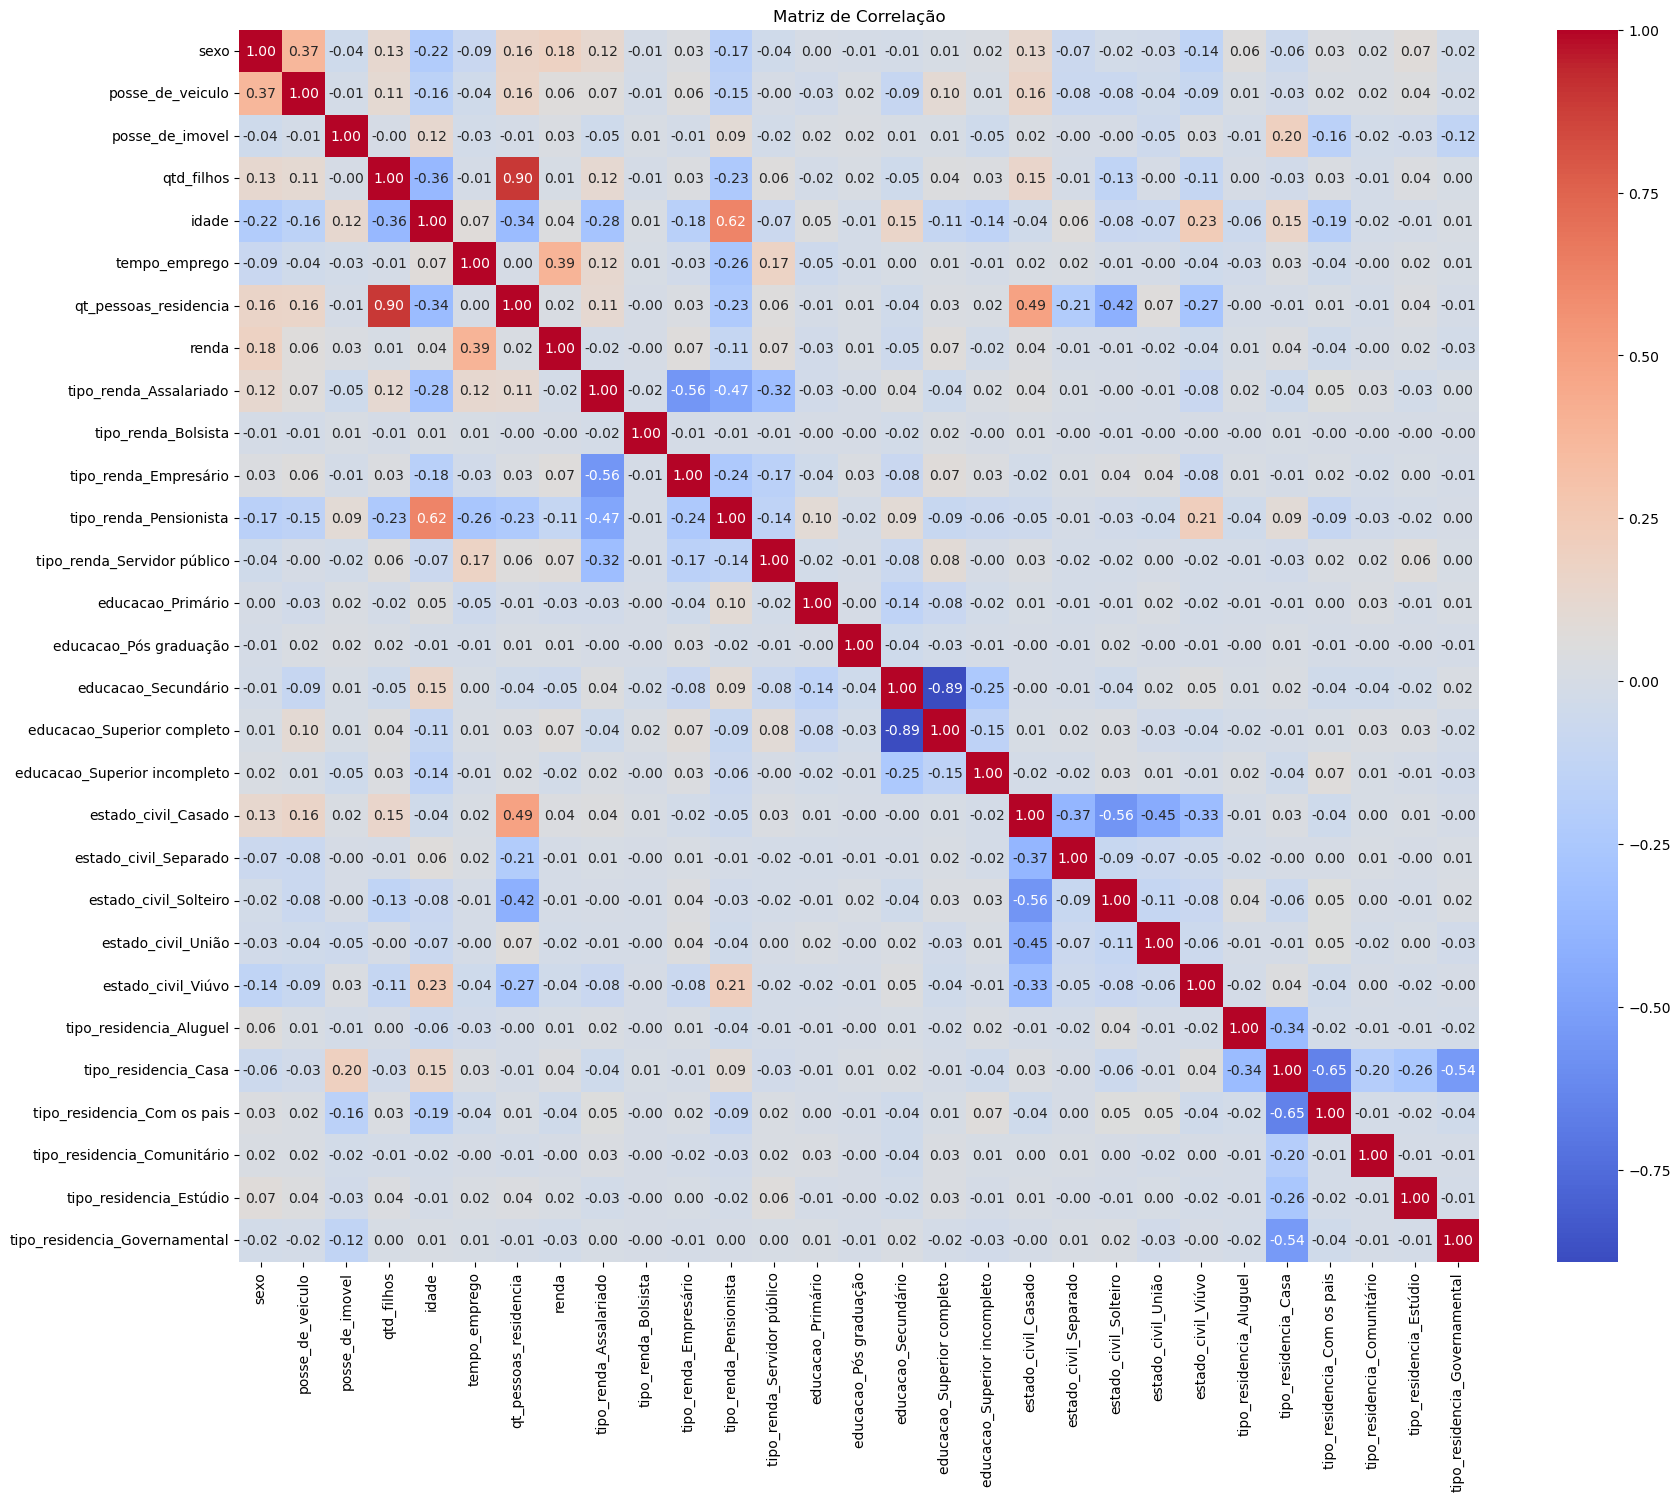

In [46]:
# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')

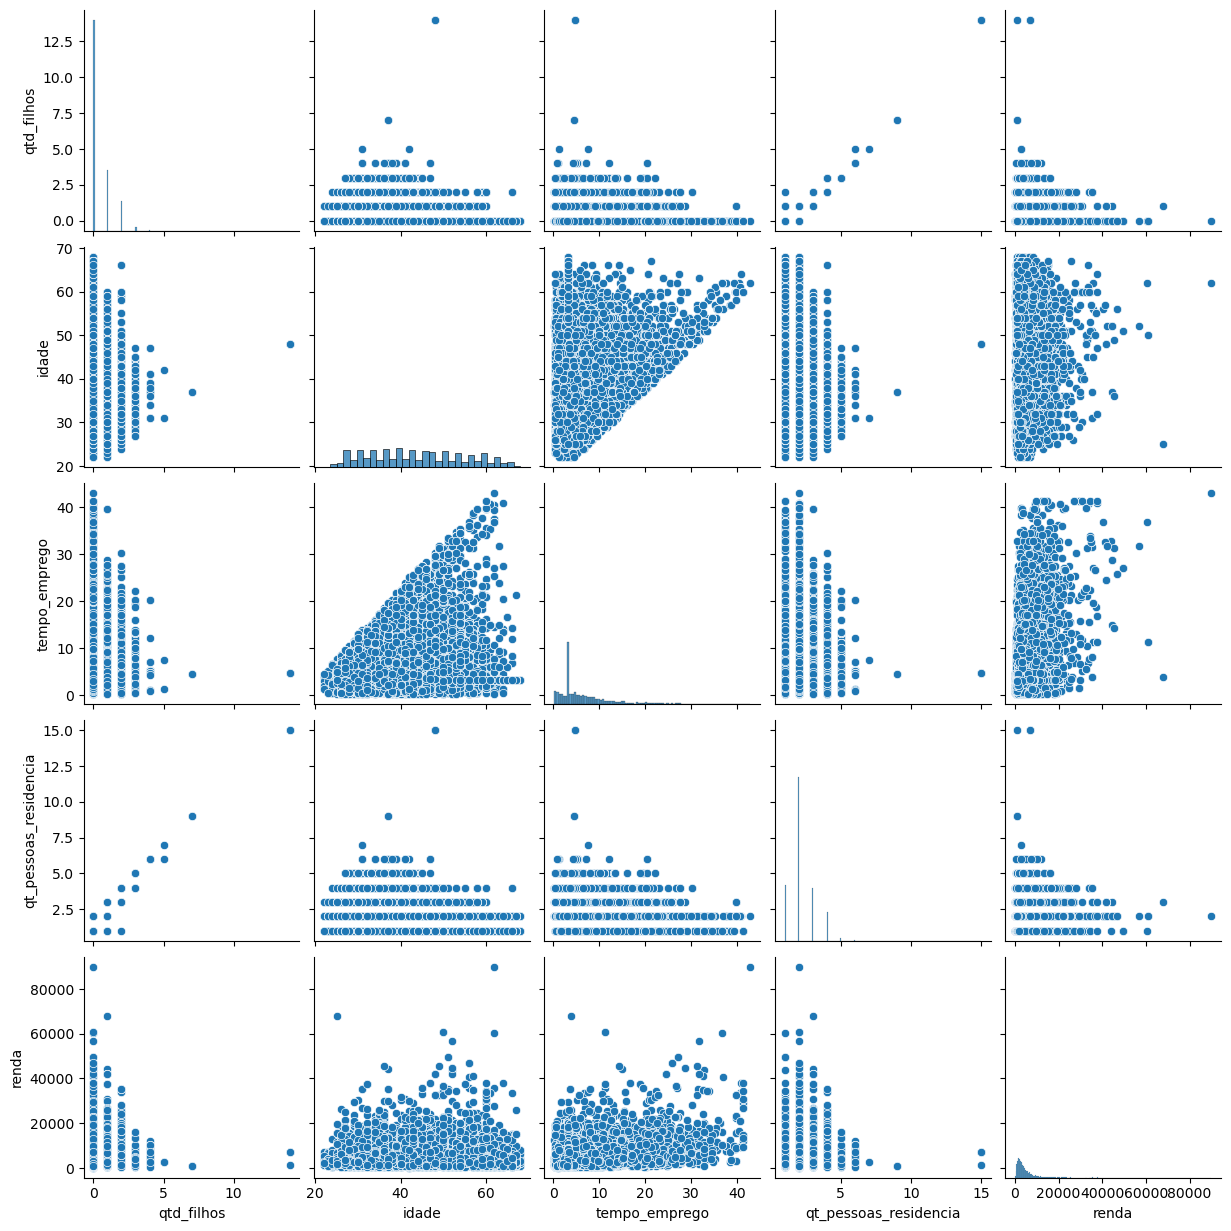

In [48]:
# Selecionar apenas as colunas numericas
cols = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
df_selected = df[cols]

# Plotar a matriz de dispersão
sns.pairplot(df_selected)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

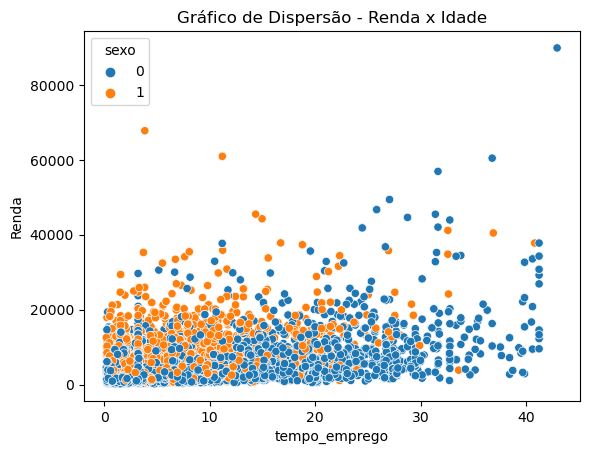

In [51]:
# Selecionar apenas as colunas desejadas
cols = ['renda', 'sexo', 'tempo_emprego']
df_selected = df[cols]

# Plotar o gráfico de dispersão
sns.scatterplot(data=df_selected, x='tempo_emprego', y='renda', hue='sexo')
plt.xlabel('tempo_emprego')
plt.ylabel('Renda')
plt.title('Gráfico de Dispersão - Renda x Idade')
plt.show()

3) Na su aopinião, há outliers na variável renda?

Alguns

4) Calcule o logaritmo da variável renda e repita a sequência de análise

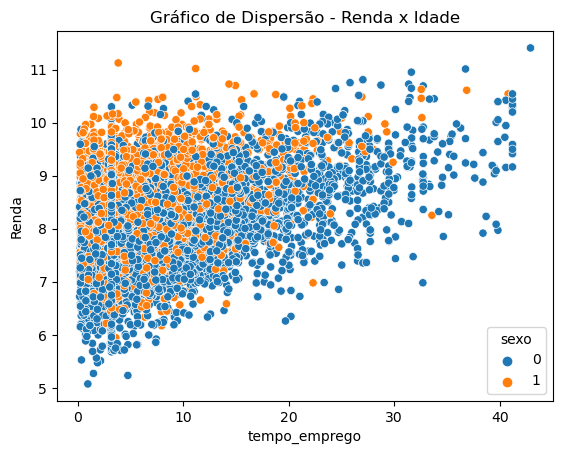

In [54]:
df_log = df_selected.copy()
df_log['log_renda'] = np.log(df_log['renda'])

# Plotar o gráfico de dispersão
sns.scatterplot(data=df_log, x='tempo_emprego', y='log_renda', hue='sexo')
plt.xlabel('tempo_emprego')
plt.ylabel('Renda')
plt.title('Gráfico de Dispersão - Renda x Idade')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

melhorou